**Homeworks – Graph Theory and Algorithms, 2021/22. semester I.**

Week 3

- name: Nagy, Balázs
- neptun: hpq7oi
- e-mail: [balazs_nagy@outlook.com](balazs_nagy@outlook.com)

In [1]:
# set the seed so we can reproduce the pseudo-random results
set_random_seed(314159265)

Below you can see my implementation. 

In [2]:
def corresponding_edge(edge):
    # edge is between vertices u and v, weight is not used
    u, v, weight = edge
    
    # coordinates of u
    x, y = u
    
    if v == (x, y+1):
        # v is in the same 'row' -> edge is horizontal
        # -> corr. edge is vertical
        return ((x, y+1), (x+1, y+1))
    elif v == (x+1, y):
        # v is in the same 'column' -> edge is vertical
        # -> corr. edge is horizontal
        return ((x+1, y), (x+1, y+1))
    else:
        # this branch should never be active
        raise ValueError

In [3]:
def maze_constructor(n, m):
    # Outer grid (visible maze)
    outer_grid = graphs.GridGraph((n+1, m+1))
    
    # Inner grid ('invisible' spanning tree)
    inner_grid = graphs.GridGraph((n, m))

    # Add random (uniformly-distributed) weights to the edges
    for u, v in inner_grid.edges(labels=0):
        inner_grid.set_edge_label(u, v, RR.random_element(0, 1))
    
    # Calculate the minimum spanning tree using Kruskal's algorithm
    min_spanning_tree = inner_grid.min_spanning_tree(weight_function = lambda edge: edge[-1], algorithm='Kruskal')
    
    # Find and delete corresponding edges
    corresponding_edges = [corresponding_edge(edge) for edge in min_spanning_tree]
    outer_grid.delete_edges(corresponding_edges)
    
    # Define the edges for the 'doors', then delete the edges
    start_door = ((0, 0), (1, 0))
    finish_door = ((n-1, m), (n, m))
    outer_grid.delete_edges([start_door, finish_door])
    
    # Display the graph
    outer_grid.show(vertex_labels=False, vertex_size=30, title=f'Maze ({n}x{m})')

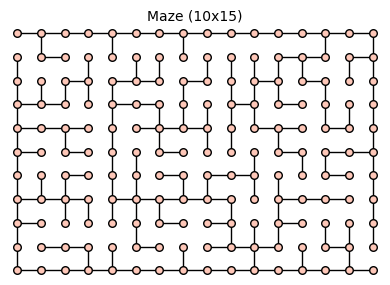

In [4]:
maze_constructor(10, 15)